# Evaluating Models
The purpose of this notebook is to test models on evaluation data and to analyze them.

In [1]:
import numpy as np
import os
import keract
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import json
import pandas as pd
from VisuWeigh.lib.util import test_on_image, evaluate_model, load_all_json

In [2]:
DATABASE_LOCATION = 'E:/cattle_data'
INPUT_PATH = DATABASE_LOCATION+'/evaluation'
DATASET = 'training.json'
MODEL_DIR = 'E:/cattle_data/models/SGDR'
COMBINE_DATA_FILES = True

In [3]:
# load evaluation data (singles)
easy_df = load_all_json(INPUT_PATH + '/easy')
hard_df = load_all_json(INPUT_PATH + '/hard')

print('Loaded {} easy datapoints!'.format(len(easy_df)))
print('Loaded {} hard datapoints!'.format(len(hard_df)))

Found 5 files.
Found 5 files.
Loaded 1266 easy datapoints!
Loaded 1079 hard datapoints!


In [4]:
# trim the data to a constrained weight range 
hard_df = hard_df[(hard_df.weight > 400) & (hard_df.weight < 1450)]
easy_df = easy_df[(easy_df.weight > 400) & (easy_df.weight < 1450)]

### Test out our functions

In [7]:
model_names = os.listdir(MODEL_DIR)
name = 'incept_freeze_adagrad_307_11009'

In [8]:
easy_result = evaluate_model(model_path=os.path.join(MODEL_DIR, name), df=easy_df)

  0%|          | 0/1266 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_307_11009 average accuracy: 86.81%


In [7]:
easy_result[0]

{'accuracy': 83.36964894830703,
 'error_mean': -26.15244635031642,
 'error_std': 133.67419768965786,
 'error_min': -283.80523681640625,
 'error_max': 498.19989013671875}

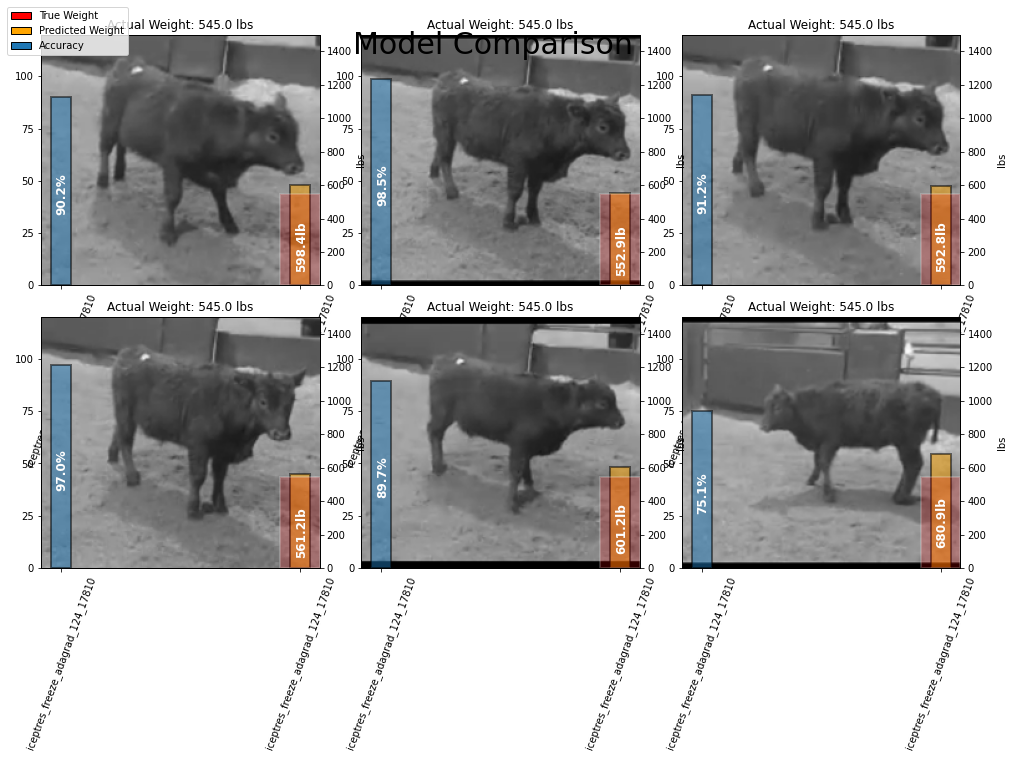

iceptres_freeze_adagrad_124_17810 average accuracy: 90.29%


[{'accuracy': 90.29232480110379,
  'error_mean': -52.906829833984375,
  'error_std': 41.40384590629283,
  'error_min': -135.867919921875,
  'error_max': -7.93853759765625}]

In [8]:
import tensorflow as tf
model = tf.keras.models.load_model(os.path.join(MODEL_DIR, name))

test_on_image([model], easy_df[80:86], model_labels=[name.split('.')[0]])

## Evaluate All Models in Directory

In [10]:
model_names = os.listdir(MODEL_DIR)

In [13]:
eval_loss_thresh = 25000

model_results = pd.read_csv(os.path.join(INPUT_PATH, 'results.csv'))

model_names = os.listdir(MODEL_DIR)

for name in model_names:
    print('')
    print(f'Running {name} on easy data')
    easy_result = evaluate_model(model_path=os.path.join(MODEL_DIR, name), df=easy_df)
    print(f'Running {name} on hard data')
    hard_result = evaluate_model(model_path=os.path.join(MODEL_DIR, name), df=hard_df)
    
    entry = {'model': name, 'easy': easy_result, 'hard': hard_result}
    model_results = pd.concat([model_results, pd.DataFrame(entry, index=[len(model_results)])])
    
nice_names = [name.split('.')[0] for name in model_names]


Running iceptres_freeze_adagrad_105_38367 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_105_38367 average accuracy: 77.46%
Running iceptres_freeze_adagrad_105_38367 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_105_38367 average accuracy: 81.94%

Running iceptres_freeze_adagrad_108_36821 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_108_36821 average accuracy: 77.28%
Running iceptres_freeze_adagrad_108_36821 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_108_36821 average accuracy: 82.52%

Running iceptres_freeze_adagrad_110_35496 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_110_35496 average accuracy: 77.41%
Running iceptres_freeze_adagrad_110_35496 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_110_35496 average accuracy: 82.67%

Running iceptres_freeze_adagrad_113_31628 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_113_31628 average accuracy: 81.68%
Running iceptres_freeze_adagrad_113_31628 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_113_31628 average accuracy: 83.49%

Running iceptres_freeze_adagrad_114_31163 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_114_31163 average accuracy: 79.78%
Running iceptres_freeze_adagrad_114_31163 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_114_31163 average accuracy: 84.08%

Running iceptres_freeze_adagrad_115_27424 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_115_27424 average accuracy: 81.97%
Running iceptres_freeze_adagrad_115_27424 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_115_27424 average accuracy: 85.15%

Running iceptres_freeze_adagrad_117_25166 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_117_25166 average accuracy: 79.79%
Running iceptres_freeze_adagrad_117_25166 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_117_25166 average accuracy: 85.67%

Running iceptres_freeze_adagrad_119_21959 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_119_21959 average accuracy: 83.15%
Running iceptres_freeze_adagrad_119_21959 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_119_21959 average accuracy: 86.60%

Running iceptres_freeze_adagrad_121_19359 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_121_19359 average accuracy: 83.63%
Running iceptres_freeze_adagrad_121_19359 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_121_19359 average accuracy: 86.28%

Running iceptres_freeze_adagrad_123_18835 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_123_18835 average accuracy: 83.62%
Running iceptres_freeze_adagrad_123_18835 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_123_18835 average accuracy: 87.36%

Running iceptres_freeze_adagrad_124_17810 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_124_17810 average accuracy: 83.37%
Running iceptres_freeze_adagrad_124_17810 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_124_17810 average accuracy: 87.12%

Running iceptres_freeze_adagrad_126_16722 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_126_16722 average accuracy: 84.84%
Running iceptres_freeze_adagrad_126_16722 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_126_16722 average accuracy: 87.58%

Running iceptres_freeze_adagrad_127_16257 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_127_16257 average accuracy: 85.58%
Running iceptres_freeze_adagrad_127_16257 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_127_16257 average accuracy: 87.46%

Running iceptres_freeze_adagrad_128_16198 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_128_16198 average accuracy: 85.62%
Running iceptres_freeze_adagrad_128_16198 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_128_16198 average accuracy: 87.53%

Running iceptres_freeze_adagrad_130_15952 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_130_15952 average accuracy: 84.82%
Running iceptres_freeze_adagrad_130_15952 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_130_15952 average accuracy: 87.36%

Running iceptres_freeze_adagrad_131_15002 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_131_15002 average accuracy: 86.15%
Running iceptres_freeze_adagrad_131_15002 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_131_15002 average accuracy: 87.15%

Running iceptres_freeze_adagrad_139_13549 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_139_13549 average accuracy: 86.28%
Running iceptres_freeze_adagrad_139_13549 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_139_13549 average accuracy: 88.27%

Running iceptres_freeze_adagrad_160_12716 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_160_12716 average accuracy: 87.35%
Running iceptres_freeze_adagrad_160_12716 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_160_12716 average accuracy: 88.33%

Running iceptres_freeze_adagrad_170_12361 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_170_12361 average accuracy: 87.39%
Running iceptres_freeze_adagrad_170_12361 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_170_12361 average accuracy: 88.94%

Running iceptres_freeze_adagrad_172_11404 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_172_11404 average accuracy: 87.50%
Running iceptres_freeze_adagrad_172_11404 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_172_11404 average accuracy: 88.73%

Running iceptres_freeze_adagrad_194_9939 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_194_9939 average accuracy: 88.21%
Running iceptres_freeze_adagrad_194_9939 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\iceptres_freeze_adagrad_194_9939 average accuracy: 89.31%

Running incept_adagrad_15_16538 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_15_16538 average accuracy: 62.17%
Running incept_adagrad_15_16538 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_15_16538 average accuracy: 77.96%

Running incept_adagrad_166_10659 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_166_10659 average accuracy: 58.99%
Running incept_adagrad_166_10659 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_166_10659 average accuracy: 75.98%

Running incept_adagrad_168_9343 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_168_9343 average accuracy: 58.79%
Running incept_adagrad_168_9343 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_168_9343 average accuracy: 75.88%

Running incept_adagrad_16_16254 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_16_16254 average accuracy: 62.69%
Running incept_adagrad_16_16254 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_16_16254 average accuracy: 78.20%

Running incept_adagrad_18_15504 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_18_15504 average accuracy: 61.92%
Running incept_adagrad_18_15504 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_18_15504 average accuracy: 77.82%

Running incept_adagrad_19_14869 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_19_14869 average accuracy: 61.74%
Running incept_adagrad_19_14869 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_19_14869 average accuracy: 77.72%

Running incept_adagrad_1_24093 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_1_24093 average accuracy: 62.76%
Running incept_adagrad_1_24093 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_1_24093 average accuracy: 78.30%

Running incept_adagrad_25_14626 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_25_14626 average accuracy: 61.46%
Running incept_adagrad_25_14626 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_25_14626 average accuracy: 77.56%

Running incept_adagrad_29_14228 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_29_14228 average accuracy: 61.45%
Running incept_adagrad_29_14228 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_29_14228 average accuracy: 77.56%

Running incept_adagrad_2_21576 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_2_21576 average accuracy: 62.73%
Running incept_adagrad_2_21576 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_2_21576 average accuracy: 78.29%

Running incept_adagrad_33_13953 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_33_13953 average accuracy: 61.37%
Running incept_adagrad_33_13953 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_33_13953 average accuracy: 77.45%

Running incept_adagrad_36_13755 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_36_13755 average accuracy: 60.74%
Running incept_adagrad_36_13755 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_36_13755 average accuracy: 77.11%

Running incept_adagrad_3_21263 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_3_21263 average accuracy: 63.03%
Running incept_adagrad_3_21263 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_3_21263 average accuracy: 78.39%

Running incept_adagrad_45_13495 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_45_13495 average accuracy: 60.12%
Running incept_adagrad_45_13495 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_45_13495 average accuracy: 76.73%

Running incept_adagrad_46_13142 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_46_13142 average accuracy: 60.14%
Running incept_adagrad_46_13142 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_46_13142 average accuracy: 76.76%

Running incept_adagrad_4_19903 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_4_19903 average accuracy: 62.72%
Running incept_adagrad_4_19903 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_4_19903 average accuracy: 78.26%

Running incept_adagrad_50_12755 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_50_12755 average accuracy: 60.07%
Running incept_adagrad_50_12755 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_50_12755 average accuracy: 76.76%

Running incept_adagrad_55_12467 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_55_12467 average accuracy: 59.84%
Running incept_adagrad_55_12467 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_55_12467 average accuracy: 76.62%

Running incept_adagrad_56_12206 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_56_12206 average accuracy: 59.85%
Running incept_adagrad_56_12206 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_56_12206 average accuracy: 76.63%

Running incept_adagrad_57_12187 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_57_12187 average accuracy: 59.85%
Running incept_adagrad_57_12187 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_57_12187 average accuracy: 76.62%

Running incept_adagrad_60_11965 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_60_11965 average accuracy: 59.81%
Running incept_adagrad_60_11965 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_60_11965 average accuracy: 76.60%

Running incept_adagrad_61_11900 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_61_11900 average accuracy: 59.79%
Running incept_adagrad_61_11900 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_61_11900 average accuracy: 76.59%

Running incept_adagrad_6_19198 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_6_19198 average accuracy: 62.52%
Running incept_adagrad_6_19198 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_6_19198 average accuracy: 78.15%

Running incept_adagrad_7_17663 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_7_17663 average accuracy: 62.53%
Running incept_adagrad_7_17663 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_7_17663 average accuracy: 78.17%

Running incept_adagrad_81_11847 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_81_11847 average accuracy: 59.12%
Running incept_adagrad_81_11847 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_81_11847 average accuracy: 76.15%

Running incept_adagrad_90_10922 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_90_10922 average accuracy: 59.08%
Running incept_adagrad_90_10922 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_90_10922 average accuracy: 76.10%

Running incept_adagrad_96_10786 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_adagrad_96_10786 average accuracy: 58.97%
Running incept_adagrad_96_10786 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_adagrad_96_10786 average accuracy: 76.04%

Running incept_freeze_adagrad_104_36059 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_104_36059 average accuracy: 77.59%
Running incept_freeze_adagrad_104_36059 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_104_36059 average accuracy: 82.86%

Running incept_freeze_adagrad_105_31243 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_105_31243 average accuracy: 80.33%
Running incept_freeze_adagrad_105_31243 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_105_31243 average accuracy: 84.39%

Running incept_freeze_adagrad_106_30521 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_106_30521 average accuracy: 79.60%
Running incept_freeze_adagrad_106_30521 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_106_30521 average accuracy: 84.70%

Running incept_freeze_adagrad_107_29561 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_107_29561 average accuracy: 81.32%
Running incept_freeze_adagrad_107_29561 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_107_29561 average accuracy: 85.40%

Running incept_freeze_adagrad_109_28867 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_109_28867 average accuracy: 80.37%
Running incept_freeze_adagrad_109_28867 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_109_28867 average accuracy: 85.08%

Running incept_freeze_adagrad_113_28655 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_113_28655 average accuracy: 80.32%
Running incept_freeze_adagrad_113_28655 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_113_28655 average accuracy: 84.03%

Running incept_freeze_adagrad_114_25130 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_114_25130 average accuracy: 83.04%
Running incept_freeze_adagrad_114_25130 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_114_25130 average accuracy: 86.19%

Running incept_freeze_adagrad_118_23605 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_118_23605 average accuracy: 80.70%
Running incept_freeze_adagrad_118_23605 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_118_23605 average accuracy: 86.57%

Running incept_freeze_adagrad_121_22387 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_121_22387 average accuracy: 83.73%
Running incept_freeze_adagrad_121_22387 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_121_22387 average accuracy: 86.56%

Running incept_freeze_adagrad_122_19644 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_122_19644 average accuracy: 84.34%
Running incept_freeze_adagrad_122_19644 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_122_19644 average accuracy: 87.32%

Running incept_freeze_adagrad_126_18773 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_126_18773 average accuracy: 84.64%
Running incept_freeze_adagrad_126_18773 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_126_18773 average accuracy: 87.34%

Running incept_freeze_adagrad_127_17666 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_127_17666 average accuracy: 85.28%
Running incept_freeze_adagrad_127_17666 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_127_17666 average accuracy: 87.86%

Running incept_freeze_adagrad_128_16642 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_128_16642 average accuracy: 86.04%
Running incept_freeze_adagrad_128_16642 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_128_16642 average accuracy: 88.56%

Running incept_freeze_adagrad_133_16033 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_133_16033 average accuracy: 85.84%
Running incept_freeze_adagrad_133_16033 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_133_16033 average accuracy: 87.88%

Running incept_freeze_adagrad_136_15313 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_136_15313 average accuracy: 85.71%
Running incept_freeze_adagrad_136_15313 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_136_15313 average accuracy: 88.86%

Running incept_freeze_adagrad_140_14824 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_140_14824 average accuracy: 85.35%
Running incept_freeze_adagrad_140_14824 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_140_14824 average accuracy: 88.78%

Running incept_freeze_adagrad_144_14529 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_144_14529 average accuracy: 86.02%
Running incept_freeze_adagrad_144_14529 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_144_14529 average accuracy: 88.72%

Running incept_freeze_adagrad_158_14467 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_158_14467 average accuracy: 86.22%
Running incept_freeze_adagrad_158_14467 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_158_14467 average accuracy: 88.46%

Running incept_freeze_adagrad_168_13852 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_168_13852 average accuracy: 86.82%
Running incept_freeze_adagrad_168_13852 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_168_13852 average accuracy: 88.58%

Running incept_freeze_adagrad_181_13681 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_181_13681 average accuracy: 87.31%
Running incept_freeze_adagrad_181_13681 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_181_13681 average accuracy: 89.53%

Running incept_freeze_adagrad_185_13111 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_185_13111 average accuracy: 88.21%
Running incept_freeze_adagrad_185_13111 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_185_13111 average accuracy: 88.71%

Running incept_freeze_adagrad_187_12304 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_187_12304 average accuracy: 86.99%
Running incept_freeze_adagrad_187_12304 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_187_12304 average accuracy: 89.41%

Running incept_freeze_adagrad_217_12161 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_217_12161 average accuracy: 87.26%
Running incept_freeze_adagrad_217_12161 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_217_12161 average accuracy: 89.50%

Running incept_freeze_adagrad_241_11832 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_241_11832 average accuracy: 88.56%
Running incept_freeze_adagrad_241_11832 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_241_11832 average accuracy: 88.99%

Running incept_freeze_adagrad_282_11528 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_282_11528 average accuracy: 87.55%
Running incept_freeze_adagrad_282_11528 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_282_11528 average accuracy: 89.77%

Running incept_freeze_adagrad_298_11182 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_298_11182 average accuracy: 88.02%
Running incept_freeze_adagrad_298_11182 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_298_11182 average accuracy: 89.78%

Running incept_freeze_adagrad_307_11009 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_307_11009 average accuracy: 87.30%
Running incept_freeze_adagrad_307_11009 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\incept_freeze_adagrad_307_11009 average accuracy: 89.82%

Running res152_adagrad_10_14093 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_10_14093 average accuracy: 63.55%
Running res152_adagrad_10_14093 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_10_14093 average accuracy: 79.13%

Running res152_adagrad_118_8426 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_118_8426 average accuracy: 64.10%
Running res152_adagrad_118_8426 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_118_8426 average accuracy: 79.11%

Running res152_adagrad_144_8258 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_144_8258 average accuracy: 63.80%
Running res152_adagrad_144_8258 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_144_8258 average accuracy: 78.79%

Running res152_adagrad_181_7978 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_181_7978 average accuracy: 64.18%
Running res152_adagrad_181_7978 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_181_7978 average accuracy: 78.85%

Running res152_adagrad_18_13996 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_18_13996 average accuracy: 65.23%
Running res152_adagrad_18_13996 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_18_13996 average accuracy: 80.05%

Running res152_adagrad_19_13915 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_19_13915 average accuracy: 64.57%
Running res152_adagrad_19_13915 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_19_13915 average accuracy: 79.74%

Running res152_adagrad_1_36569 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_1_36569 average accuracy: 62.18%
Running res152_adagrad_1_36569 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_1_36569 average accuracy: 77.98%

Running res152_adagrad_20_13139 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_20_13139 average accuracy: 64.82%
Running res152_adagrad_20_13139 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_20_13139 average accuracy: 79.82%

Running res152_adagrad_21_12946 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_21_12946 average accuracy: 64.63%
Running res152_adagrad_21_12946 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_21_12946 average accuracy: 79.73%

Running res152_adagrad_224_7672 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_224_7672 average accuracy: 63.43%
Running res152_adagrad_224_7672 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_224_7672 average accuracy: 78.14%

Running res152_adagrad_22_12899 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_22_12899 average accuracy: 65.10%
Running res152_adagrad_22_12899 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_22_12899 average accuracy: 79.95%

Running res152_adagrad_24_12645 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_24_12645 average accuracy: 65.16%
Running res152_adagrad_24_12645 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_24_12645 average accuracy: 79.95%

Running res152_adagrad_26_11956 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_26_11956 average accuracy: 64.98%
Running res152_adagrad_26_11956 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_26_11956 average accuracy: 79.83%

Running res152_adagrad_29_11461 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_29_11461 average accuracy: 64.97%
Running res152_adagrad_29_11461 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_29_11461 average accuracy: 79.80%

Running res152_adagrad_2_27533 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_2_27533 average accuracy: 62.26%
Running res152_adagrad_2_27533 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_2_27533 average accuracy: 78.10%

Running res152_adagrad_3_20972 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_3_20972 average accuracy: 62.03%
Running res152_adagrad_3_20972 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_3_20972 average accuracy: 78.12%

Running res152_adagrad_41_11422 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_41_11422 average accuracy: 64.48%
Running res152_adagrad_41_11422 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_41_11422 average accuracy: 79.63%

Running res152_adagrad_43_10179 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_43_10179 average accuracy: 65.21%
Running res152_adagrad_43_10179 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_43_10179 average accuracy: 80.03%

Running res152_adagrad_45_10015 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_45_10015 average accuracy: 65.66%
Running res152_adagrad_45_10015 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_45_10015 average accuracy: 80.21%

Running res152_adagrad_59_9321 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_59_9321 average accuracy: 64.62%
Running res152_adagrad_59_9321 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_59_9321 average accuracy: 79.62%

Running res152_adagrad_5_17037 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_5_17037 average accuracy: 63.05%
Running res152_adagrad_5_17037 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_5_17037 average accuracy: 78.85%

Running res152_adagrad_62_8998 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_62_8998 average accuracy: 64.80%
Running res152_adagrad_62_8998 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_62_8998 average accuracy: 79.74%

Running res152_adagrad_7_16098 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_7_16098 average accuracy: 63.60%
Running res152_adagrad_7_16098 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_7_16098 average accuracy: 79.18%

Running res152_adagrad_8_15828 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_8_15828 average accuracy: 63.40%
Running res152_adagrad_8_15828 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_8_15828 average accuracy: 79.04%

Running res152_adagrad_95_8840 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_95_8840 average accuracy: 64.02%
Running res152_adagrad_95_8840 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_95_8840 average accuracy: 79.14%

Running res152_adagrad_9_14330 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\res152_adagrad_9_14330 average accuracy: 63.56%
Running res152_adagrad_9_14330 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\res152_adagrad_9_14330 average accuracy: 79.15%

Running vgg19_adagrad_100_18573 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_100_18573 average accuracy: 85.74%
Running vgg19_adagrad_100_18573 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_100_18573 average accuracy: 87.09%

Running vgg19_adagrad_104_17799 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_104_17799 average accuracy: 85.07%
Running vgg19_adagrad_104_17799 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_104_17799 average accuracy: 87.16%

Running vgg19_adagrad_110_16059 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_110_16059 average accuracy: 85.94%
Running vgg19_adagrad_110_16059 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_110_16059 average accuracy: 87.21%

Running vgg19_adagrad_112_15951 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_112_15951 average accuracy: 85.89%
Running vgg19_adagrad_112_15951 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_112_15951 average accuracy: 87.58%

Running vgg19_adagrad_164_15087 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_164_15087 average accuracy: 85.89%
Running vgg19_adagrad_164_15087 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_164_15087 average accuracy: 87.54%

Running vgg19_adagrad_16_41029 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_16_41029 average accuracy: 78.41%
Running vgg19_adagrad_16_41029 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_16_41029 average accuracy: 82.38%

Running vgg19_adagrad_18_37157 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_18_37157 average accuracy: 77.76%
Running vgg19_adagrad_18_37157 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_18_37157 average accuracy: 82.82%

Running vgg19_adagrad_201_14701 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_201_14701 average accuracy: 87.31%
Running vgg19_adagrad_201_14701 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_201_14701 average accuracy: 88.55%

Running vgg19_adagrad_218_13591 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_218_13591 average accuracy: 86.56%
Running vgg19_adagrad_218_13591 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_218_13591 average accuracy: 88.49%

Running vgg19_adagrad_221_12429 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_221_12429 average accuracy: 87.43%
Running vgg19_adagrad_221_12429 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_221_12429 average accuracy: 88.40%

Running vgg19_adagrad_24_34025 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_24_34025 average accuracy: 79.11%
Running vgg19_adagrad_24_34025 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_24_34025 average accuracy: 83.66%

Running vgg19_adagrad_34_33497 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_34_33497 average accuracy: 80.81%
Running vgg19_adagrad_34_33497 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_34_33497 average accuracy: 83.43%

Running vgg19_adagrad_37_31471 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_37_31471 average accuracy: 80.55%
Running vgg19_adagrad_37_31471 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_37_31471 average accuracy: 84.17%

Running vgg19_adagrad_43_30934 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_43_30934 average accuracy: 80.59%
Running vgg19_adagrad_43_30934 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_43_30934 average accuracy: 84.98%

Running vgg19_adagrad_45_30897 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_45_30897 average accuracy: 80.41%
Running vgg19_adagrad_45_30897 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_45_30897 average accuracy: 84.36%

Running vgg19_adagrad_47_26233 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_47_26233 average accuracy: 82.22%
Running vgg19_adagrad_47_26233 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_47_26233 average accuracy: 84.79%

Running vgg19_adagrad_52_25283 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_52_25283 average accuracy: 82.68%
Running vgg19_adagrad_52_25283 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_52_25283 average accuracy: 85.59%

Running vgg19_adagrad_55_23146 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_55_23146 average accuracy: 83.81%
Running vgg19_adagrad_55_23146 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_55_23146 average accuracy: 85.83%

Running vgg19_adagrad_60_22933 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_60_22933 average accuracy: 83.61%
Running vgg19_adagrad_60_22933 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_60_22933 average accuracy: 86.26%

Running vgg19_adagrad_64_22129 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_64_22129 average accuracy: 83.34%
Running vgg19_adagrad_64_22129 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_64_22129 average accuracy: 86.31%

Running vgg19_adagrad_6_48139 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_6_48139 average accuracy: 76.52%
Running vgg19_adagrad_6_48139 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_6_48139 average accuracy: 81.80%

Running vgg19_adagrad_7_45477 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_7_45477 average accuracy: 77.77%
Running vgg19_adagrad_7_45477 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_7_45477 average accuracy: 82.17%

Running vgg19_adagrad_80_20165 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_80_20165 average accuracy: 84.68%
Running vgg19_adagrad_80_20165 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_80_20165 average accuracy: 86.28%

Running vgg19_adagrad_83_20013 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_83_20013 average accuracy: 84.18%
Running vgg19_adagrad_83_20013 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_83_20013 average accuracy: 86.64%

Running vgg19_adagrad_8_43093 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_8_43093 average accuracy: 77.87%
Running vgg19_adagrad_8_43093 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_8_43093 average accuracy: 82.31%

Running vgg19_adagrad_94_19053 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_94_19053 average accuracy: 85.39%
Running vgg19_adagrad_94_19053 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_94_19053 average accuracy: 87.12%

Running vgg19_adagrad_99_18780 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_99_18780 average accuracy: 85.22%
Running vgg19_adagrad_99_18780 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_adagrad_99_18780 average accuracy: 87.23%

Running vgg19_false_adagrad_115_17688 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_115_17688 average accuracy: 85.71%
Running vgg19_false_adagrad_115_17688 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_115_17688 average accuracy: 87.27%

Running vgg19_false_adagrad_120_16501 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_120_16501 average accuracy: 85.94%
Running vgg19_false_adagrad_120_16501 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_120_16501 average accuracy: 87.28%

Running vgg19_false_adagrad_14_46583 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_14_46583 average accuracy: 71.18%
Running vgg19_false_adagrad_14_46583 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_14_46583 average accuracy: 80.63%

Running vgg19_false_adagrad_161_16314 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_161_16314 average accuracy: 85.73%
Running vgg19_false_adagrad_161_16314 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_161_16314 average accuracy: 87.22%

Running vgg19_false_adagrad_16_43937 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_16_43937 average accuracy: 79.70%
Running vgg19_false_adagrad_16_43937 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_16_43937 average accuracy: 81.01%

Running vgg19_false_adagrad_17_39524 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_17_39524 average accuracy: 76.83%
Running vgg19_false_adagrad_17_39524 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_17_39524 average accuracy: 82.98%

Running vgg19_false_adagrad_186_16235 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_186_16235 average accuracy: 85.34%
Running vgg19_false_adagrad_186_16235 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_186_16235 average accuracy: 87.29%

Running vgg19_false_adagrad_18_34296 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_18_34296 average accuracy: 80.33%
Running vgg19_false_adagrad_18_34296 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_18_34296 average accuracy: 83.81%

Running vgg19_false_adagrad_192_14443 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_192_14443 average accuracy: 87.42%
Running vgg19_false_adagrad_192_14443 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_192_14443 average accuracy: 87.38%

Running vgg19_false_adagrad_218_13652 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_218_13652 average accuracy: 86.95%
Running vgg19_false_adagrad_218_13652 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_218_13652 average accuracy: 87.96%

Running vgg19_false_adagrad_25_32226 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_25_32226 average accuracy: 80.67%
Running vgg19_false_adagrad_25_32226 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_25_32226 average accuracy: 84.36%

Running vgg19_false_adagrad_27_31469 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_27_31469 average accuracy: 81.76%
Running vgg19_false_adagrad_27_31469 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_27_31469 average accuracy: 84.48%

Running vgg19_false_adagrad_31_30915 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_31_30915 average accuracy: 82.68%
Running vgg19_false_adagrad_31_30915 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_31_30915 average accuracy: 83.68%

Running vgg19_false_adagrad_38_26809 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_38_26809 average accuracy: 83.63%
Running vgg19_false_adagrad_38_26809 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_38_26809 average accuracy: 84.81%

Running vgg19_false_adagrad_39_24722 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_39_24722 average accuracy: 84.14%
Running vgg19_false_adagrad_39_24722 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_39_24722 average accuracy: 85.47%

Running vgg19_false_adagrad_53_23230 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_53_23230 average accuracy: 85.00%
Running vgg19_false_adagrad_53_23230 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_53_23230 average accuracy: 86.42%

Running vgg19_false_adagrad_5_48745 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_5_48745 average accuracy: 71.96%
Running vgg19_false_adagrad_5_48745 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_5_48745 average accuracy: 81.33%

Running vgg19_false_adagrad_61_21890 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_61_21890 average accuracy: 83.85%
Running vgg19_false_adagrad_61_21890 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_61_21890 average accuracy: 86.42%

Running vgg19_false_adagrad_64_21210 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_64_21210 average accuracy: 84.67%
Running vgg19_false_adagrad_64_21210 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_64_21210 average accuracy: 86.76%

Running vgg19_false_adagrad_74_20521 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_74_20521 average accuracy: 84.66%
Running vgg19_false_adagrad_74_20521 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_74_20521 average accuracy: 86.18%

Running vgg19_false_adagrad_86_18846 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_86_18846 average accuracy: 86.81%
Running vgg19_false_adagrad_86_18846 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_86_18846 average accuracy: 86.79%

Running vgg19_false_adagrad_8_47526 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_8_47526 average accuracy: 74.61%
Running vgg19_false_adagrad_8_47526 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_8_47526 average accuracy: 81.48%

Running vgg19_false_adagrad_90_18041 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_90_18041 average accuracy: 85.03%
Running vgg19_false_adagrad_90_18041 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_90_18041 average accuracy: 87.07%

Running vgg19_false_adagrad_99_18023 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_99_18023 average accuracy: 85.10%
Running vgg19_false_adagrad_99_18023 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_99_18023 average accuracy: 87.35%

Running vgg19_false_adagrad_9_47481 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_9_47481 average accuracy: 70.79%
Running vgg19_false_adagrad_9_47481 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\vgg19_false_adagrad_9_47481 average accuracy: 80.64%

Running xcept_adagrad_10_19829 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_10_19829 average accuracy: 66.62%
Running xcept_adagrad_10_19829 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_10_19829 average accuracy: 79.65%

Running xcept_adagrad_112_13633 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_112_13633 average accuracy: 65.17%
Running xcept_adagrad_112_13633 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_112_13633 average accuracy: 79.53%

Running xcept_adagrad_141_13511 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_141_13511 average accuracy: 65.03%
Running xcept_adagrad_141_13511 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_141_13511 average accuracy: 79.55%

Running xcept_adagrad_14_18588 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_14_18588 average accuracy: 66.41%
Running xcept_adagrad_14_18588 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_14_18588 average accuracy: 79.74%

Running xcept_adagrad_15_17908 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_15_17908 average accuracy: 66.52%
Running xcept_adagrad_15_17908 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_15_17908 average accuracy: 79.75%

Running xcept_adagrad_17_17046 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_17_17046 average accuracy: 66.11%
Running xcept_adagrad_17_17046 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_17_17046 average accuracy: 79.60%

Running xcept_adagrad_194_13323 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_194_13323 average accuracy: 63.97%
Running xcept_adagrad_194_13323 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_194_13323 average accuracy: 79.29%

Running xcept_adagrad_19_16499 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_19_16499 average accuracy: 66.08%
Running xcept_adagrad_19_16499 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_19_16499 average accuracy: 79.70%

Running xcept_adagrad_1_30079 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_1_30079 average accuracy: 70.40%
Running xcept_adagrad_1_30079 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_1_30079 average accuracy: 80.95%

Running xcept_adagrad_221_13274 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_221_13274 average accuracy: 63.28%
Running xcept_adagrad_221_13274 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_221_13274 average accuracy: 78.86%

Running xcept_adagrad_226_11861 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_226_11861 average accuracy: 63.30%
Running xcept_adagrad_226_11861 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_226_11861 average accuracy: 78.93%

Running xcept_adagrad_22_15355 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_22_15355 average accuracy: 66.00%
Running xcept_adagrad_22_15355 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_22_15355 average accuracy: 79.69%

Running xcept_adagrad_2_24442 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_2_24442 average accuracy: 68.29%
Running xcept_adagrad_2_24442 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_2_24442 average accuracy: 80.09%

Running xcept_adagrad_37_15333 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_37_15333 average accuracy: 65.79%
Running xcept_adagrad_37_15333 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_37_15333 average accuracy: 79.55%

Running xcept_adagrad_3_24036 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_3_24036 average accuracy: 67.17%
Running xcept_adagrad_3_24036 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_3_24036 average accuracy: 79.93%

Running xcept_adagrad_43_15080 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_43_15080 average accuracy: 65.83%
Running xcept_adagrad_43_15080 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_43_15080 average accuracy: 79.51%

Running xcept_adagrad_4_22875 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_4_22875 average accuracy: 66.92%
Running xcept_adagrad_4_22875 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_4_22875 average accuracy: 79.87%

Running xcept_adagrad_5_21604 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_5_21604 average accuracy: 66.83%
Running xcept_adagrad_5_21604 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_5_21604 average accuracy: 79.67%

Running xcept_adagrad_65_15046 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_65_15046 average accuracy: 65.83%
Running xcept_adagrad_65_15046 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_65_15046 average accuracy: 79.59%

Running xcept_adagrad_6_20265 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_6_20265 average accuracy: 66.77%
Running xcept_adagrad_6_20265 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_6_20265 average accuracy: 79.70%

Running xcept_adagrad_72_13677 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_72_13677 average accuracy: 66.14%
Running xcept_adagrad_72_13677 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_72_13677 average accuracy: 79.68%

Running xcept_adagrad_8_19938 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_8_19938 average accuracy: 66.63%
Running xcept_adagrad_8_19938 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_8_19938 average accuracy: 79.65%

Running xcept_adagrad_9_19895 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_adagrad_9_19895 average accuracy: 66.62%
Running xcept_adagrad_9_19895 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_adagrad_9_19895 average accuracy: 79.65%

Running xcept_freeze_adagrad_101_39413 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_101_39413 average accuracy: 79.79%
Running xcept_freeze_adagrad_101_39413 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_101_39413 average accuracy: 82.84%

Running xcept_freeze_adagrad_102_26584 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_102_26584 average accuracy: 81.87%
Running xcept_freeze_adagrad_102_26584 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_102_26584 average accuracy: 85.68%

Running xcept_freeze_adagrad_104_19727 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_104_19727 average accuracy: 84.94%
Running xcept_freeze_adagrad_104_19727 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_104_19727 average accuracy: 85.60%

Running xcept_freeze_adagrad_107_17400 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_107_17400 average accuracy: 85.75%
Running xcept_freeze_adagrad_107_17400 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_107_17400 average accuracy: 87.20%

Running xcept_freeze_adagrad_108_17377 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_108_17377 average accuracy: 85.08%
Running xcept_freeze_adagrad_108_17377 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_108_17377 average accuracy: 87.62%

Running xcept_freeze_adagrad_109_16309 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_109_16309 average accuracy: 85.79%
Running xcept_freeze_adagrad_109_16309 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_109_16309 average accuracy: 87.91%

Running xcept_freeze_adagrad_111_15776 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_111_15776 average accuracy: 85.73%
Running xcept_freeze_adagrad_111_15776 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_111_15776 average accuracy: 87.96%

Running xcept_freeze_adagrad_113_14868 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_113_14868 average accuracy: 86.39%
Running xcept_freeze_adagrad_113_14868 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_113_14868 average accuracy: 87.96%

Running xcept_freeze_adagrad_114_13514 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_114_13514 average accuracy: 86.76%
Running xcept_freeze_adagrad_114_13514 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_114_13514 average accuracy: 88.02%

Running xcept_freeze_adagrad_120_13272 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_120_13272 average accuracy: 86.37%
Running xcept_freeze_adagrad_120_13272 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_120_13272 average accuracy: 88.50%

Running xcept_freeze_adagrad_129_12748 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_129_12748 average accuracy: 86.85%
Running xcept_freeze_adagrad_129_12748 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_129_12748 average accuracy: 88.74%

Running xcept_freeze_adagrad_147_12604 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_147_12604 average accuracy: 86.59%
Running xcept_freeze_adagrad_147_12604 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_147_12604 average accuracy: 88.91%

Running xcept_freeze_adagrad_161_12524 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_161_12524 average accuracy: 87.59%
Running xcept_freeze_adagrad_161_12524 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_161_12524 average accuracy: 89.13%

Running xcept_freeze_adagrad_164_12479 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_164_12479 average accuracy: 87.91%
Running xcept_freeze_adagrad_164_12479 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_164_12479 average accuracy: 88.67%

Running xcept_freeze_adagrad_168_12107 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_168_12107 average accuracy: 87.35%
Running xcept_freeze_adagrad_168_12107 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_168_12107 average accuracy: 89.26%

Running xcept_freeze_adagrad_170_12099 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_170_12099 average accuracy: 87.85%
Running xcept_freeze_adagrad_170_12099 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_170_12099 average accuracy: 89.35%

Running xcept_freeze_adagrad_17_72495 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_17_72495 average accuracy: 64.54%
Running xcept_freeze_adagrad_17_72495 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_17_72495 average accuracy: 79.12%

Running xcept_freeze_adagrad_181_11781 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_181_11781 average accuracy: 87.83%
Running xcept_freeze_adagrad_181_11781 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_181_11781 average accuracy: 89.36%

Running xcept_freeze_adagrad_194_11393 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_194_11393 average accuracy: 89.09%
Running xcept_freeze_adagrad_194_11393 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_194_11393 average accuracy: 89.73%

Running xcept_freeze_adagrad_1_85169 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_1_85169 average accuracy: 69.93%
Running xcept_freeze_adagrad_1_85169 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_1_85169 average accuracy: 81.08%

Running xcept_freeze_adagrad_200_11047 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_200_11047 average accuracy: 89.11%
Running xcept_freeze_adagrad_200_11047 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_200_11047 average accuracy: 89.76%

Running xcept_freeze_adagrad_209_10666 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_209_10666 average accuracy: 88.98%
Running xcept_freeze_adagrad_209_10666 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_209_10666 average accuracy: 89.80%

Running xcept_freeze_adagrad_26_71723 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_26_71723 average accuracy: 64.47%
Running xcept_freeze_adagrad_26_71723 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_26_71723 average accuracy: 79.14%

Running xcept_freeze_adagrad_27_69016 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_27_69016 average accuracy: 64.48%
Running xcept_freeze_adagrad_27_69016 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_27_69016 average accuracy: 79.14%

Running xcept_freeze_adagrad_2_77847 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_2_77847 average accuracy: 66.87%
Running xcept_freeze_adagrad_2_77847 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_2_77847 average accuracy: 79.97%

Running xcept_freeze_adagrad_33_67691 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_33_67691 average accuracy: 64.70%
Running xcept_freeze_adagrad_33_67691 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_33_67691 average accuracy: 79.28%

Running xcept_freeze_adagrad_53_66871 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_53_66871 average accuracy: 64.96%
Running xcept_freeze_adagrad_53_66871 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_53_66871 average accuracy: 79.51%

Running xcept_freeze_adagrad_5_74121 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_5_74121 average accuracy: 64.89%
Running xcept_freeze_adagrad_5_74121 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_5_74121 average accuracy: 79.16%

Running xcept_freeze_adagrad_79_66589 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_79_66589 average accuracy: 65.07%
Running xcept_freeze_adagrad_79_66589 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_79_66589 average accuracy: 79.60%

Running xcept_freeze_adagrad_8_73185 on easy data


  0%|          | 0/279 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_8_73185 average accuracy: 64.84%
Running xcept_freeze_adagrad_8_73185 on hard data


  0%|          | 0/302 [00:00<?, ?it/s]

SGDR\xcept_freeze_adagrad_8_73185 average accuracy: 79.17%


## Results 
Let's look at the metrics to compare the best results of each model. 

### Save the Results

In [14]:
model_results.to_csv(os.path.join(INPUT_PATH, 'results.csv'))

In [3]:
model_results = pd.read_csv(os.path.join(INPUT_PATH, 'results.csv'))

### Decode
Here we will decode the parameters from the name of the model and add the metrics to the dataframe. 

In [4]:
model_results['max_abs_error'] = model_results.error_max - model_results.error_min

In [5]:
def nice_name(name):
    return name.split('\\')[-1]

In [6]:
def model_type(name):
    return name.split('_')[0]

In [7]:
model_results.name = model_results.name.apply(nice_name)

In [8]:
model_results['architecture'] = model_results.name.apply(model_type)

In [9]:
def get_opt(name):
    if name.split('_')[1] == 'freeze':
        return name.split('_')[2]
    elif name.split('_')[1] == 'false':
        return name.split('_')[2]
    else:
        return name.split('_')[1]
    return name.split('_')[1]

In [10]:
model_results['opt'] = model_results.name.apply(get_opt)

In [11]:
def get_mse(name):
    return name.split('_')[-1]

In [12]:
model_results['mse'] = model_results.name.apply(get_mse)

### Results

In [15]:
final = model_results[~(model_results.data_set=='hand_cleaned')].drop(columns=['name']).sort_values(by=['architecture', 'mean_abs_accuracy']).groupby(by=['architecture', 'opt', 'data_set']).tail(1)

In [16]:
final

,mean_abs_accuracy,mean_abs_error,error_mean,error_std,error_min,error_max,data_set,max_abs_error,architecture,opt,mse
62,88.044419,83.580021,-6.423456,108.462051,-497.868164,425.523926,hard,923.392090,iceptres,adagrad,9939
57,88.108539,80.864895,2.700670,104.936165,-457.388184,483.397705,easy,940.785889,iceptres,adagrad,11404
213,88.102922,81.621850,-4.042571,107.434397,-456.222900,427.786987,easy,884.009888,incept,adagrad,11832
218,88.169894,82.904085,5.503901,109.001480,-477.048096,437.769775,hard,914.817871,incept,adagrad,11528
237,69.953768,179.393562,-101.816420,193.811816,-425.657715,598.849121,easy,1024.506836,res152,adagrad,13996
239,75.683217,154.932479,-76.606941,179.763000,-430.867432,580.997070,hard,1011.864502,res152,adagrad,13996
332,87.218459,91.127340,5.500420,117.399314,-385.196472,452.281738,hard,837.478210,vgg19,adagrad,12429
330,88.031994,80.570954,-5.468732,102.878640,-312.337769,436.529480,easy,748.867249,vgg19,adagrad,12429
593,89.077170,76.928798,-0.304180,100.753163,-443.944763,463.715942,hard,907.660706,xcept,adagrad,10666
588,89.135180,73.626753,-7.263009,94.888820,-365.463013,483.342407,easy,848.805420,xcept,adagrad,11047


There are some interesting results here. You will notice, most of the models perform better on the hard dataset than the easy one. This is because more of the training data is similar to the hard dataset than the easy dataset. That means these models are going to do a better job of weighing a running cow that a cow that is standing still. 

We can compare our best model to the [best previous model by Mikel Gjergji](https://ieeexplore.ieee.org/document/9207624).

Our model achieved a MAE of 73.6 lb which is 33.40kg. Gjergji's model achieved an MAE of 23.19kg.  
So it is lagging behind in performance, but it is also using much harder data to achieve this result. Gjergji's training data came from a well constrained environment where the animal pose was always similar with identical surroundings.
Considering that there is no restriction to the angle or movement of the animal for the VisuWeigh models, their performance is competitive with other research. 